In [1]:
import sklearn
from sklearn import datasets

iris = datasets.load_iris()
X_temp = iris.data
y_temp = iris.target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X, y = X_temp[:, [0,1]], y_temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
import numpy as np

print ('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_train),np.std(X_train)))
print ('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_test),np.std(X_test)))

Training set mean:0.00 and standard deviation:1.00
Testing set mean:0.13 and standard deviation:0.71


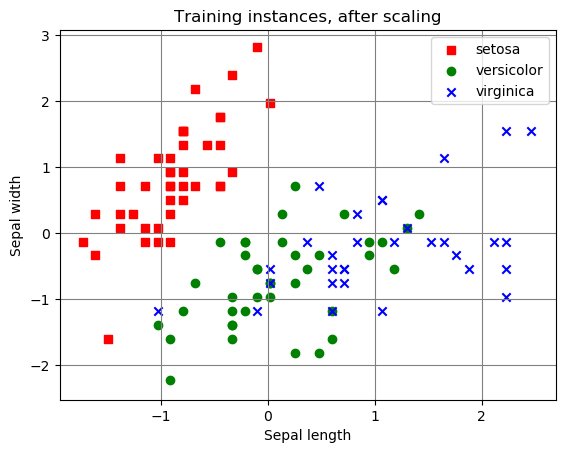

In [7]:
import matplotlib.pyplot as plt

colour_mk = [ ['red','s'], ['green','o'], ['blue','x']]
plt.figure('Training Data')

for i in range(len(colour_mk)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colour_mk[i][0], marker=colour_mk[i][1])

# plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('default')
plt.grid(c='grey')

plt.title('Training instances, after scaling')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [8]:
import copy 

y_train_setosa = copy.copy(y_train) 
y_train_setosa[y_train_setosa > 0]=1
y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa > 0]=1

print ('New training target classes:\n{0}'.format(y_train_setosa))

New training target classes:
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


In [9]:
from sklearn import linear_model 
clf = linear_model.SGDClassifier(loss='log', random_state=42)

In [10]:
clf.fit(X_train, y_train_setosa)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
print (clf.coef_,clf.intercept_)

[[ 31.0790909  -17.78632765]] [17.31337552]


In [13]:
print ('If the flower has 4.6 petal width and 3.2 petal length is a {}'.format(
        iris.target_names[clf.predict(scaler.transform([[4.6, 3.2]]))]))

If the flower has 4.6 petal width and 3.2 petal length is a ['setosa']
